In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

In [2]:
def eur_option_price(sigma=0.3, T=1, t=0, steps=5, r=0.03, S=100, K=100):
    S = [[S]]
    dt = T/steps
    u = np.exp(sigma * dt**0.5)
    d = 1/u
    p = (np.exp(r*dt)-d)/(u-d)

    for i in range(int(T/dt)):
        S.append([S[len(S)-1][0]*u, *list(np.array(S[len(S)-1])*d)])

    puts = [list(map(max, np.zeros(len(S[len(S)-1])), [K-x for x in S[len(S)-1]]))]
    calls = [list(map(max, np.zeros(len(S[len(S)-1])), [x-K for x in S[len(S)-1]]))]

    for index in range(len(S)-2, -1, -1):
        puts.append([p*np.exp(-r*dt)*puts[len(puts)-1][index1] +
                                             (1-p)*np.exp(-r*dt)*puts[len(puts)-1][index1+1]
                                             for index1 in range(len(S[index+1])-1)])
        calls.append([p * np.exp(-r * dt) * calls[len(calls) - 1][index1] +
                              (1 - p) * np.exp(-r * dt) * calls[len(calls) - 1][index1 + 1]
                              for index1 in range(len(S[index + 1]) - 1)])
        
    return (calls[len(calls)-t-1], puts[len(puts)-t-1], S, puts, calls)

In [3]:
sigma=0.3
T=1
r=0.03
S=100
K=100

put, call, _, _, _ = eur_option_price()
print('Put price: %.2f' % put[0])
print('Call price: %.2f' % call[0])

Put price: 13.86
Call price: 10.91


In [5]:
puts = []
calls = []
steps = list(range(2, 1000))        

for step in steps:
        put, call, _, _, _ = eur_option_price(steps=step)
        puts.append(put[0])
        calls.append(call[0])

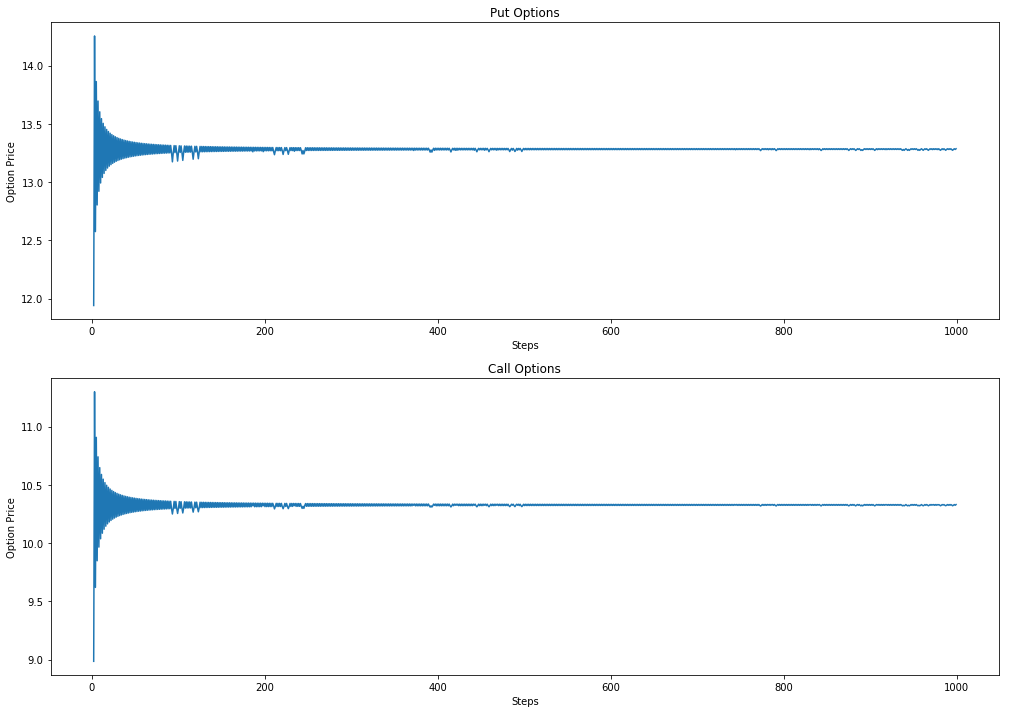

In [6]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(17, 12)

axs[0].plot(steps, puts)
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Option Price')
axs[0].title.set_text('Put Options')

axs[1].plot(steps, calls)
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Option Price')
axs[1].title.set_text('Call Options')

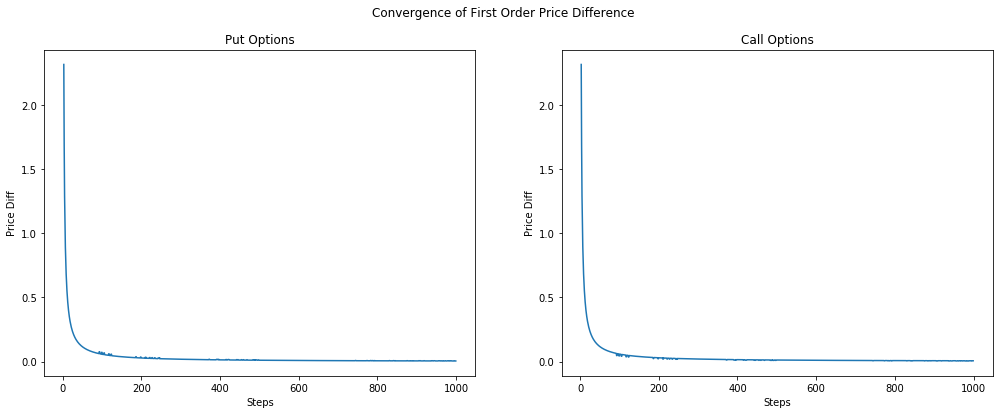

In [7]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(17, 6)
fig.suptitle('Convergence of First Order Price Difference')

axs[0].plot(steps[1:], abs(np.diff(np.array(puts))), label='Puts')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Price Diff')
axs[0].title.set_text('Put Options')

axs[1].plot(steps[1:], abs(np.diff(np.array(calls))), label='Calls')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Price Diff')
axs[1].title.set_text('Call Options')

In [20]:
def plot_tree(stock_price_tree, ax, steps=3):
#     ax.annotate('%.2f' % stock_price_tree[0][0], xy=(0, stock_price_tree[0][0]))
    for ind in range(len(stock_price_tree)-2, -1, -1):
        print(ind)
        start_time = time.time()
        for ind1 in range(len(stock_price_tree[ind])):
            x_coords = [ind, ind+1]
            y_coords1 = [stock_price_tree[ind][ind1], stock_price_tree[ind+1][ind1]]
            y_coords2 = [stock_price_tree[ind][ind1], stock_price_tree[ind+1][ind1+1]]

            ax.plot(x_coords, y_coords1)
            ax.plot(x_coords, y_coords2)
#             ax.annotate('%.2f' % y_coords1[1], xy=(x_coords[1], y_coords1[1]))
#             ax.annotate('%.2f' % y_coords2[1], xy=(x_coords[1], y_coords2[1]))
        print('Plotted in %.2f seconds' %(time.time() - start_time))

    ax.set_xlabel('Steps')
    ax.set_ylabel('Stock Price')
    fig.suptitle('Stock Price Tree')

In [9]:
finalised_steps = 600

In [10]:
put_price, call_price, stock_price_tree, put_tree, call_tree = eur_option_price(steps=finalised_steps)
print('Put price with %i steps: %.2f' % (finalised_steps, put_price[0]))
print('Call price with %i steps: %.2f' % (finalised_steps, call_price[0]))

Put price with 600 steps: 13.28
Call price with 600 steps: 10.32


In [ ]:
# Uncomment this to plot binomial stock price tree. Takes forever with 600 steps.
fig= plt.figure(1)
ax = fig.add_subplot(111)
fig.set_size_inches(10, 10)
plot_tree(stock_price_tree, ax, steps=finalised_steps)

plt.figure(2)
plt.hist(stock_price_tree[len(stock_price_tree)-1])
plt.title('Histogram of terminal stock price distribution')

In [24]:
import networkx as nx

def plot_tree_nx(stock_price_tree):
#     ax.annotate('%.2f' % stock_price_tree[0][0], xy=(0, stock_price_tree[0][0]))
    G = nx.Graph()
    for ind in range(len(stock_price_tree)-2, -1, -1):
        print(ind)
        start_time = time.time()
        for ind1 in range(len(stock_price_tree[ind])):
            x_coords = [ind, ind+1]
            y_coords1 = [stock_price_tree[ind][ind1], stock_price_tree[ind+1][ind1]]
            y_coords2 = [stock_price_tree[ind][ind1], stock_price_tree[ind+1][ind1+1]]
            
            G.add_edge((x_coords[0], y_coords1[0]), (x_coords[1], y_coords1[1]))
            G.add_edge((x_coords[0], y_coords2[0]), (x_coords[1], y_coords2[1]))

#             ax.plot(x_coords, y_coords1)
#             ax.plot(x_coords, y_coords2)
#             ax.annotate('%.2f' % y_coords1[1], xy=(x_coords[1], y_coords1[1]))
#             ax.annotate('%.2f' % y_coords2[1], xy=(x_coords[1], y_coords2[1]))
        print('Plotted in %.2f seconds' %(time.time() - start_time))
    nx.draw(G)

#     ax.set_xlabel('Steps')
#     ax.set_ylabel('Stock Price')
#     fig.suptitle('Stock Price Tree')

In [ ]:
plot_tree_nx(stock_price_tree)

In [10]:
binomial_hedge_ratios = np.zeros((2, finalised_steps, finalised_steps))

for ind in range(finalised_steps):
    denom = np.flip(np.diff(np.flip(np.array(stock_price_tree[len(stock_price_tree)-1-ind]))))
    num1 = np.flip(np.diff(np.flip(np.array(call_tree[ind]))))
    num2 = np.flip(np.diff(np.flip(np.array(put_tree[ind]))))
    binomial_hedge_ratios[0, ind, 0:finalised_steps-ind] = num1 / denom
    binomial_hedge_ratios[1, ind, 0:finalised_steps-ind] = num2 / denom

In [11]:
bs_hedge_ratios = np.zeros((2, finalised_steps, finalised_steps))
for ind in range(1, finalised_steps):
    t = T * ind / finalised_steps
    num = np.log(np.array(stock_price_tree[len(stock_price_tree)-1-ind]) / K) + (r + sigma**2 / 2) * t
    denom = sigma * t**0.5

    bs_hedge_ratios[0, ind-1, 0:finalised_steps-ind+1] = norm.cdf(num / denom)
    bs_hedge_ratios[1, ind-1, 0:finalised_steps-ind+1] = norm.cdf(num / denom) - 1

In [12]:
diff = (bs_hedge_ratios - binomial_hedge_ratios)

print('Call option:')
print('Min: %.2f , Max: %.2f , Average: %.2f' % (diff[0].min(), diff[0].max(), diff[0].mean()))

Call option:
Min: -0.60 , Max: 0.16 , Average: 0.00


In [13]:
def american_option_price(sigma=0.3, T=1, t=0, steps=5, r=0.03, S=100, K=100):
    S = [[S]]
    dt = T/steps
    u = np.exp(sigma * dt**0.5)
    d = 1/u
    p = (np.exp(r*dt)-d)/(u-d)

    for i in range(int(T/dt)):
        S.append([S[len(S)-1][0]*u, *list(np.array(S[len(S)-1])*d)])

    puts = [list(map(max, np.zeros(len(S[len(S)-1])), [K-x for x in S[len(S)-1]]))]
    calls = [list(map(max, np.zeros(len(S[len(S)-1])), [x-K for x in S[len(S)-1]]))]

    for index in range(len(S)-2, -1, -1):
        puts.append(list(map(max, list(map(max, np.zeros(index+1), [K-x for x in S[index]])),
                                 [p*np.exp(-r*dt)*puts[len(puts)-1][index1] +
                                             (1-p)*np.exp(-r*dt)*puts[len(puts)-1][index1+1]
                                             for index1 in range(len(S[index+1])-1)])))
        calls.append(list(map(max, list(map(max, np.zeros(index+1), [x-K for x in S[index]])),
                                  [p * np.exp(-r * dt) * calls[len(calls) - 1][index1] +
                              (1 - p) * np.exp(-r * dt) * calls[len(calls) - 1][index1 + 1]
                              for index1 in range(len(S[index+1]) - 1)])))
        
    return (calls[len(calls)-t-1], puts[len(puts)-t-1], S, puts, calls)

_, put_price, _, _, _ = american_option_price(steps=finalised_steps)
print('Price of American Put: %.2f' % put_price[0])

Price of American Put: 10.61
